In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from src.__init__ import ROOT_DIR

In [2]:
meta_path = os.path.join(ROOT_DIR, 'data/brixia/metadata_global_v2.csv')
meta_data = pd.read_csv(meta_path, sep=';', dtype={'BrixiaScore': str}, index_col='Filename')

In [3]:
mean = np.mean(meta_data['BrixiaScoreGlobal'])
std = np.std(meta_data['BrixiaScoreGlobal'])
print(f'Data mean: {mean}')
print(f'Data std: {std}')


#t = (meta_data['BrixiaScoreGlobal'].to_numpy()-mean)/std

Data mean: 8.301171458998935
Data std: 4.238173887832961


In [4]:
weights = np.empty(19)
weights.fill(len(meta_data['BrixiaScoreGlobal']))
class_count = meta_data['BrixiaScoreGlobal'].value_counts().sort_index()
weights /= class_count
weights /= weights.max()
weights

0     0.450980
1     0.139394
2     0.076923
3     0.091633
4     0.085502
5     0.083032
6     0.062162
7     0.065527
8     0.059432
9     0.065156
10    0.058824
11    0.064607
12    0.072327
13    0.088123
14    0.098712
15    0.140244
16    0.198276
17    0.383333
18    1.000000
Name: BrixiaScoreGlobal, dtype: float64

Number of train samples: 4545


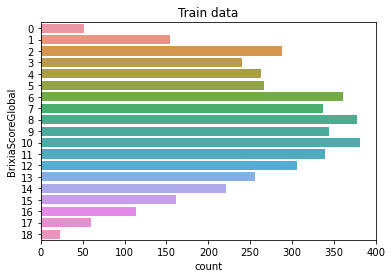

In [5]:
train_data = meta_data[meta_data['ConsensusTestset'] == 0]
print(f'Number of train samples: {len(train_data)}')
ax = sns.countplot(y='BrixiaScoreGlobal',  data=train_data)
plt.title("Train data")
plt.show()

Number of test samples: 150


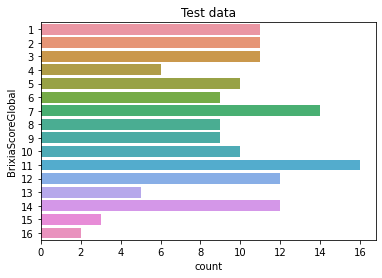

In [6]:
test_data = meta_data[meta_data['ConsensusTestset'] == 1]
print(f'Number of test samples: {len(test_data)}')
ax = sns.countplot(y='BrixiaScoreGlobal',  data=test_data)
plt.title("Test data")
plt.show()

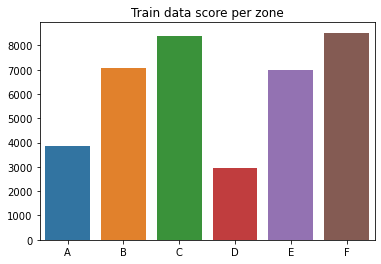

In [7]:
train_brixia = train_data['BrixiaScore']
tmp = np.zeros((len(train_data),6))

for i in range(0,len(train_data)-1):
    label_i = np.array(list(train_brixia.iloc[i]), dtype=int)
    tmp[i,:] = label_i

tmp = pd.DataFrame(tmp, columns=['A','B','C','D','E','F'])
tmp = tmp.sum(axis=0)

ax = sns.barplot(tmp.index, tmp.values)
plt.title("Train data score per zone")
plt.show()

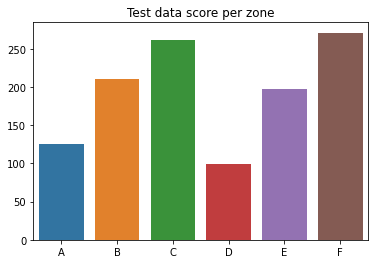

In [8]:
test_brixia = test_data['BrixiaScore']
tmp = np.zeros((len(test_data),6))

for i in range(0,len(test_data)-1):
    label_i = np.array(list(test_brixia.iloc[i]), dtype=int)
    tmp[i,:] = label_i

tmp = pd.DataFrame(tmp, columns=['A','B','C','D','E','F'])
tmp = tmp.sum(axis=0)

ax = sns.barplot(tmp.index, tmp.values)
plt.title("Test data score per zone")
plt.show()